In [5]:
import numpy as np #MAKES NECESSARY IMPORTS
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") #REMOVES ANNOYING WARNINGS

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df=pd.read_csv("/content/drive/MyDrive/hamoye-stage-E/household_power_consumption.csv")

In [ ]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [16]:
df.describe(include="all")

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Energy_Consumed
count,2049280,2049280,2.049280e+06,2049280,2049280,2049280,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
unique,1433,1440,NaN,895,5167,376,NaN,NaN,NaN,NaN
top,2010-09-23 00:00:00,20:20:00,NaN,0.000,241.180,1.000,NaN,NaN,NaN,NaN
freq,1440,1427,NaN,472786,3519,169406,NaN,NaN,NaN,NaN
first,2006-12-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2010-12-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.091615e+00,NaN,NaN,NaN,1.121923e+00,1.298520e+00,6.458447e+00,9.314693e+00
std,NaN,NaN,1.057294e+00,NaN,NaN,NaN,6.153031e+00,5.822026e+00,8.437154e+00,9.585916e+00
min,NaN,NaN,7.600000e-02,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,NaN,NaN,3.080000e-01,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,3.800000e+00


In [10]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [45]:
df["Global_active_power"] = df["Global_active_power"].apply(lambda x:float(x))
df["Sub_metering_1"] = df["Sub_metering_1"].apply(lambda x:float(x))
df["Sub_metering_2"] = df["Sub_metering_2"].apply(lambda x:float(x))
df["Global_reactive_power"] = df["Global_reactive_power"].apply(lambda x:float(x))
df["Voltage"] = df["Voltage"].apply(lambda x:float(x))
df["Global_intensity"] = df["Global_intensity"].apply(lambda x:float(x))

In [46]:
df["Energy_Consumed"] = df["Global_active_power"] * 1000/60 - (df["Sub_metering_1"] + df["Sub_metering_2"] + df["Sub_metering_3"])

In [47]:
df["Date"] = pd.to_datetime(df["Date"])

In [48]:
df[["Voltage","Global_intensity"]].corr() 

,Voltage,Global_intensity
Voltage,1.000000,-0.411363
Global_intensity,-0.411363,1.000000


In [49]:
df[["Global_active_power","Global_reactive_power"]].corr() 

,Global_active_power,Global_reactive_power
Global_active_power,1.000000,0.247017
Global_reactive_power,0.247017,1.000000


In [31]:
df_agg=df.groupby('Date').mean()

In [50]:
df_agg.head()

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Energy_Consumed
0,2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394,37.073064
1,2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583,25.657407
2,2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722,13.214190
3,2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472,9.119375
4,2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972,14.156111


In [51]:
df_agg.reset_index(inplace=True)

In [52]:
df_agg.head()

,index,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Energy_Consumed
0,0,2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394,37.073064
1,1,2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583,25.657407
2,2,2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722,13.214190
3,3,2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472,9.119375
4,4,2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972,14.156111


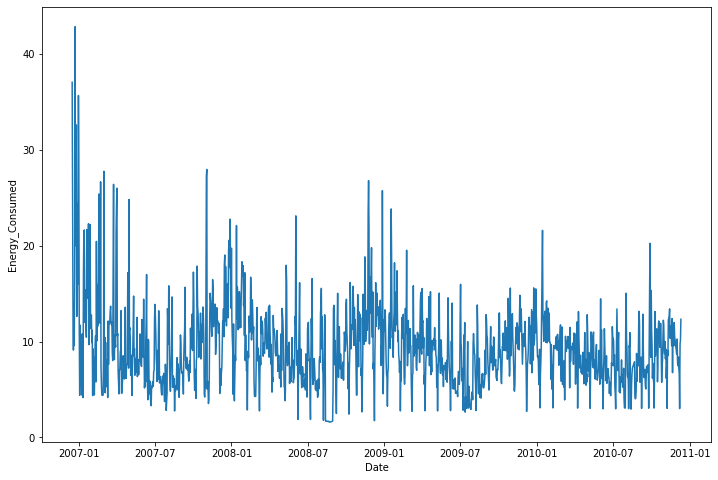

In [53]:
plt.figure(figsize=(12,8))
sns.lineplot(x=df_agg["Date"],y=df_agg["Energy_Consumed"])

In [53]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adfuller(df_agg["Energy_Consumed"]) #p-value which is the 2nd value is lower than 0.05 so the data is stationary

(-4.953130490010197,
 2.7455148100225602e-05,
 24,
 1408,
 {'1%': -3.435002884902567,
  '10%': -2.56786403055995,
  '5%': -2.8635949199569324},
 7283.684965676835)

In [ ]:
df_agg["Energy_diff"] = df_agg["Energy_Consumed"] - df_agg["Energy_Consumed"].shift(12) 

In [ ]:
adfuller(df_agg["Energy_diff"].dropna())

(-13.056325325984309,
 2.0912277881658887e-24,
 24,
 1396,
 {'1%': -3.435042954953382,
  '10%': -2.567873447118661,
  '5%': -2.8636126027916173},
 7596.922073349639)

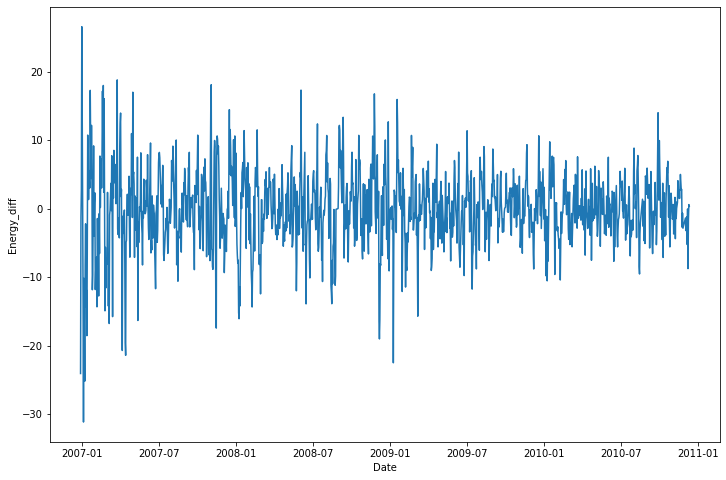

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(x=df_agg["Date"],y=df_agg["Energy_diff"])

# MODEL BUILDING

In [ ]:
#ARIMA

In [ ]:
df_agg.dropna(inplace=True)
df_agg.reset_index(inplace=True)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

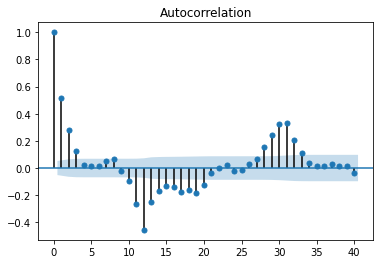

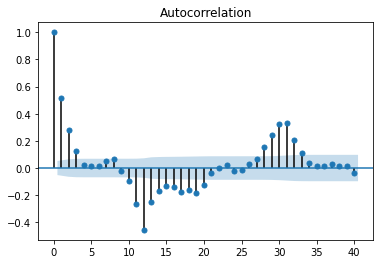

In [ ]:
plot_acf(df_agg["Energy_diff"],lags=40)

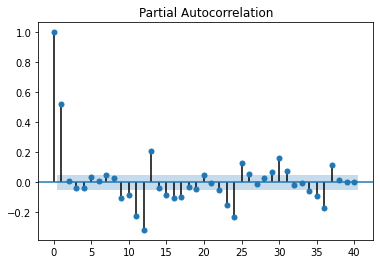

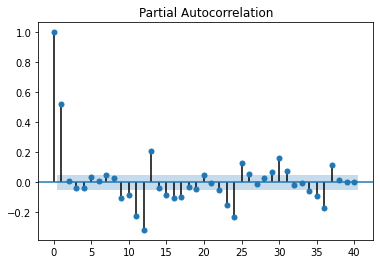

In [ ]:
plot_pacf(df_agg["Energy_diff"],lags=40)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
arima = ARIMA(df_agg["Energy_diff"],order=(2,1,4))

In [ ]:
model_arima =arima.fit()

In [ ]:
df_agg["arima_pred"] = model_arima.predict()

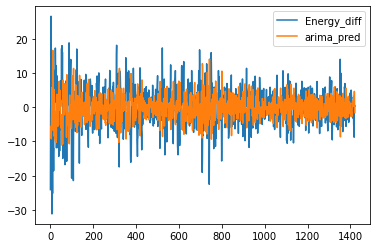

In [ ]:
df_agg[["Energy_diff","arima_pred"]].plot()

In [ ]:
sarima = sm.tsa.statespace.SARIMAX(df_agg["Energy_diff"],order=(2,1,4),seasonal_order=(2,1,4,12))

In [ ]:
model_sarima = sarima.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
df_agg["sarimax_pred"] = model_sarima.predict()

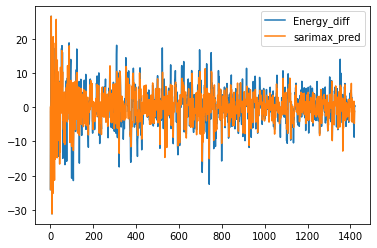

In [ ]:
df_agg[["Energy_diff","sarimax_pred"]].plot()

In [28]:
df_agg.reset_index(inplace=True)

In [ ]:
#PROPHET

In [24]:
import fbprophet

In [25]:
from fbprophet import Prophet

In [54]:
df_agg.head()

,index,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Energy_Consumed
0,0,2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394,37.073064
1,1,2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583,25.657407
2,2,2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722,13.214190
3,3,2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472,9.119375
4,4,2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972,14.156111


In [55]:
df_agg_proph = df_agg[["Date","Global_active_power"]]
df_agg_proph.head()

,Date,Global_active_power
0,2006-12-16,3.053475
1,2006-12-17,2.354486
2,2006-12-18,1.530435
3,2006-12-19,1.157079
4,2006-12-20,1.545658


In [56]:
df_agg_proph.columns = ['ds','y']

In [57]:
df_agg_proph.head()

,ds,y
0,2006-12-16,3.053475
1,2006-12-17,2.354486
2,2006-12-18,1.530435
3,2006-12-19,1.157079
4,2006-12-20,1.545658


In [81]:
model_proph = Prophet()

In [79]:
train = df_agg_proph[:len(df_agg_proph)-365]
test= df_agg_proph[len(df_agg_proph)-365:]

In [82]:
model_proph.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [83]:
proph_predict = model_proph.predict(test)

In [84]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [85]:
mean_absolute_percentage_error(test["y"],proph_predict["yhat"])

30.92866258369522

In [87]:
from sklearn.metrics import mean_squared_error

In [88]:
np.sqrt(mean_squared_error(test["y"],proph_predict["yhat"]))

0.33948362572315605

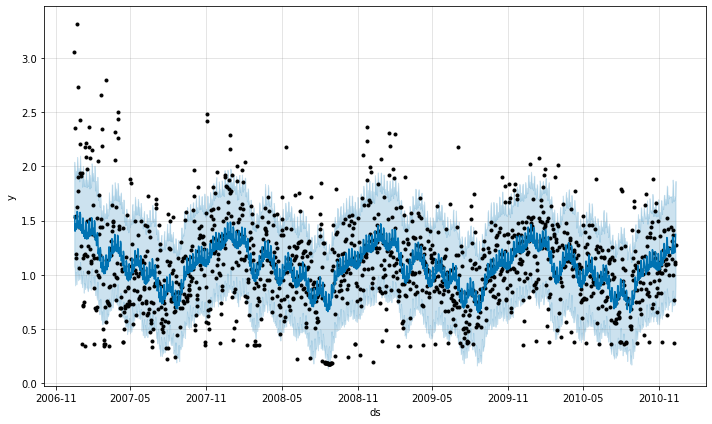

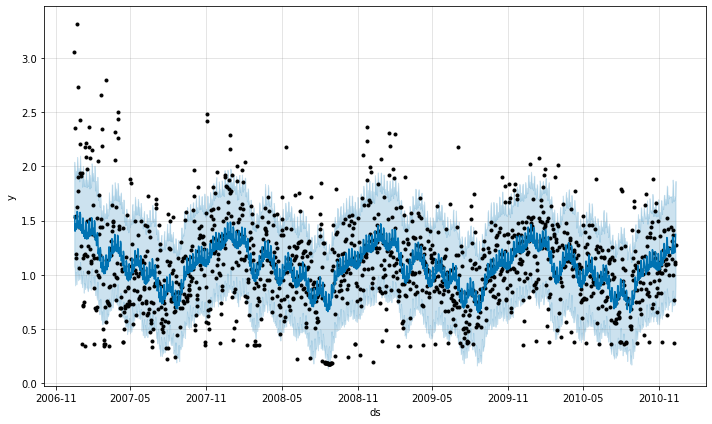

In [39]:
model_proph.plot(proph_predict)